### Questions 1 and 2 with transaction sums

In [9]:
import numpy as np
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import matplotlib.pyplot as plt


In [10]:
import csv

data = pd.read_csv("LiquorSalesSamplev2.csv")
data.head(10)
print("Number of lines present: ", len(data))
# data.info()

Number of lines present:  1004380


In [11]:
data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
data.head()

,Reference,Invoice/Item Number,Invoice,Item Number,Date,Store Number,City,Zip Code,County,Category Name,Label,Item Description,Pack,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Day,Year
0,167646,3.06831E+11,306831300,20,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA 80 PROOF,Vodka,Burnett's Vodka 80 Prf,12,750,1,6.82,0.75,7,30,12
1,262366,3.06831E+11,306831300,15,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA FLAVORED,Vodka,Uv Cake Vodka,12,750,1,9.74,0.75,7,30,12
2,794258,3.06831E+11,306831300,9,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA FLAVORED,Vodka,Firefly Sweet Tea Vodka,12,750,1,14.00,0.75,7,30,12
3,19508,4295S05259700026,4295S0525,26,4/26/12,4295,DES MOINES,50317,Polk,CANADIAN WHISKIES,Whiskey,Crown Royal Canadian Whisky,24,375,4,44.16,1.50,4,26,12
4,64511,4295S05259700008,4295S0525,8,4/26/12,4295,DES MOINES,50317,Polk,100 PROOF VODKA,Vodka,Mccormick Vodka,12,750,12,59.52,9.00,4,26,12


In [12]:
data['Month'].unique()

array(['7', '4', '1', '2', '3', '5', '6', '8', '10', '9', '11', '12'],
      dtype=object)

## Question 1:  
What times of the year have liquor sales been the highest?

In [22]:
def timeofyear_sum(filename, Time, Sales, year): 
    data = pd.read_csv(filename) 
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand=True) 
    data['Month'] = pd.to_numeric(data['Month']) 
    data = data[data['Year'] == year]
    data = data.sort_values(by='Month') 
    data = data.groupby(data[Time]) 
    mean_of_col = data[Sales].sum() 
    print(mean_of_col)
    return mean_of_col 

Month
1     1934565.74
2     2275774.31
3     2177612.16
4     2386653.77
5     2659377.44
6     2635233.30
7     2489378.59
8     2637725.30
9     2230767.41
10    4022641.40
11    2395599.34
12    3217669.67
Name: Sale (Dollars), dtype: float64


Month
1     1934565.74
3     2177612.16
9     2230767.41
2     2275774.31
4     2386653.77
11    2395599.34
7     2489378.59
6     2635233.30
8     2637725.30
5     2659377.44
12    3217669.67
10    4022641.40
Name: Sale (Dollars), dtype: float64

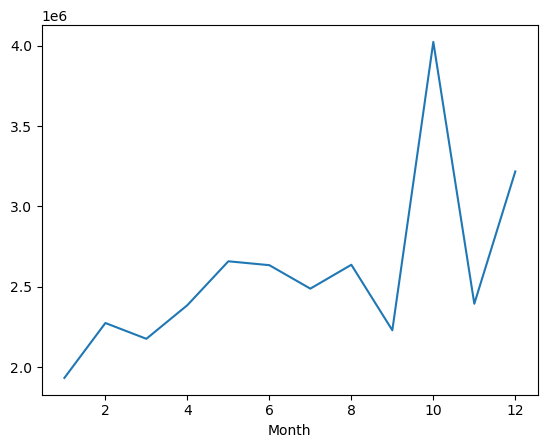

In [24]:
year_2012 = timeofyear_sum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '12')
year_2012.plot();
year_2012.sort_values()

Month
1     2118847.13
2     2210405.81
3     2275231.11
4     2726346.01
5     2590629.70
6     2326769.14
7     2744631.97
8     2668849.98
9     2396351.23
10    3794459.91
11    2188322.10
12    3339908.83
Name: Sale (Dollars), dtype: float64


Month
1     2118847.13
11    2188322.10
2     2210405.81
3     2275231.11
6     2326769.14
9     2396351.23
5     2590629.70
8     2668849.98
4     2726346.01
7     2744631.97
12    3339908.83
10    3794459.91
Name: Sale (Dollars), dtype: float64

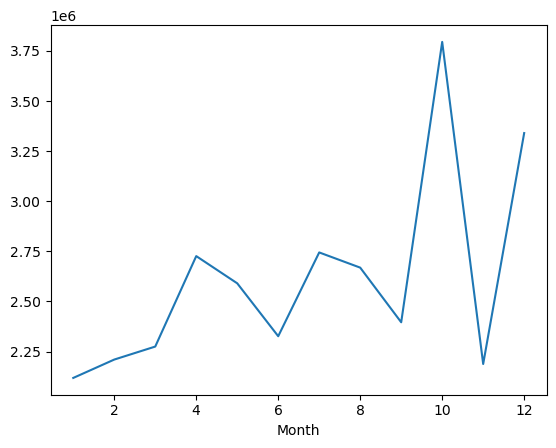

In [25]:
year_2013 = timeofyear_sum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '13')
year_2013.plot();
year_2013.sort_values()

Month
1     2531312.49
2     2349847.83
3     2455182.93
4     2842951.67
5     2535762.97
6     2936948.46
7     2613989.36
8     2553074.03
9     2824358.74
10    3257069.45
11    2370377.17
12    3689630.75
Name: Sale (Dollars), dtype: float64


Month
2     2349847.83
11    2370377.17
3     2455182.93
1     2531312.49
5     2535762.97
8     2553074.03
7     2613989.36
9     2824358.74
4     2842951.67
6     2936948.46
10    3257069.45
12    3689630.75
Name: Sale (Dollars), dtype: float64

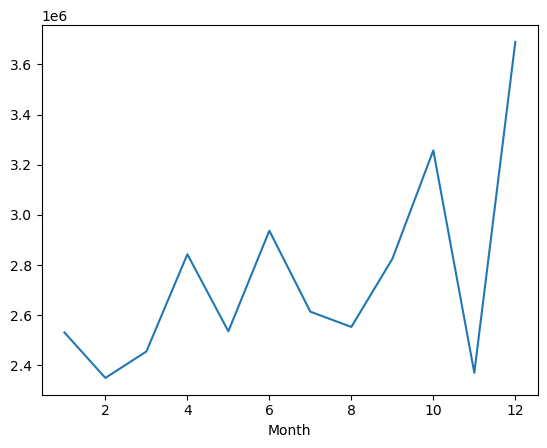

In [26]:
year_2014 = timeofyear_sum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '14')
year_2014.plot();
year_2014.sort_values()

Month
1     2254845.65
2     2498023.69
3     2715201.66
4     2713762.58
5     2684133.87
6     3244972.19
7     2627346.99
8     2678506.45
9     2894814.62
10    3003592.72
11    2805592.89
Name: Sale (Dollars), dtype: float64


Month
1     2254845.65
2     2498023.69
7     2627346.99
8     2678506.45
5     2684133.87
4     2713762.58
3     2715201.66
11    2805592.89
9     2894814.62
10    3003592.72
6     3244972.19
Name: Sale (Dollars), dtype: float64

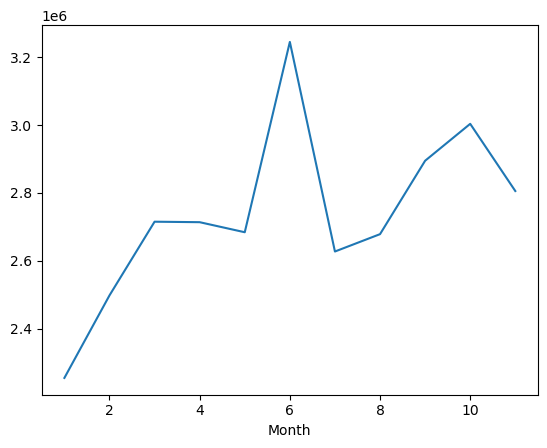

In [27]:
year_2015 = timeofyear_sum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '15')
year_2015.plot();
year_2015.sort_values()

## Question 2:  
Are there hotspots in the state where liquor sales have been higher than the average?


In [77]:
# Q2: Are there hotspots where liquor sales are higher than average? mention highest and lowest
# make graph of this for both county and city

def location_sum(filename, County, Sales):
    data = pd.read_csv(filename)
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
    data = data.groupby(data[County])
    sum_of_col = data[Sales].sum() 
    return sum_of_col.sort_values()

def location_mean(filename, County, Sales):
    data = pd.read_csv(filename)
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
    data = data.groupby(data[County])
    mean_of_col = data[Sales].sum().mean() 
    return mean_of_col
    # max_avg, min_avg = mean_of_col.max(), mean_of_col.min()
    # return max_avg, min_avg

## Reminder: Taylor county has lowest average liqour sales overall, Dallas county has highest average liquor sales overall.
## Reminder: West Branch city has lowest average liqour sales overall, Le Claire city has highest average liquor sales overall.


In [78]:
county_mean = location_mean('LiquorSalesSamplev2.csv', 'County', 'Sale (Dollars)')
city_mean = location_mean('LiquorSalesSamplev2.csv', 'City', 'Sale (Dollars)')

print(county_mean)
print(city_mean)

1267929.803131313
319402.1641475827


/tmp/ipykernel_400/3048273666.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


County
Fremont           540.44
Davis            2372.39
Taylor           2892.27
Ringgold         3128.72
Adams            3901.66
                 ...    
Johnson        453390.35
Black Hawk     518243.04
Scott          613344.93
Linn           677367.99
Polk          1644572.52
Name: Sale (Dollars), Length: 99, dtype: float64


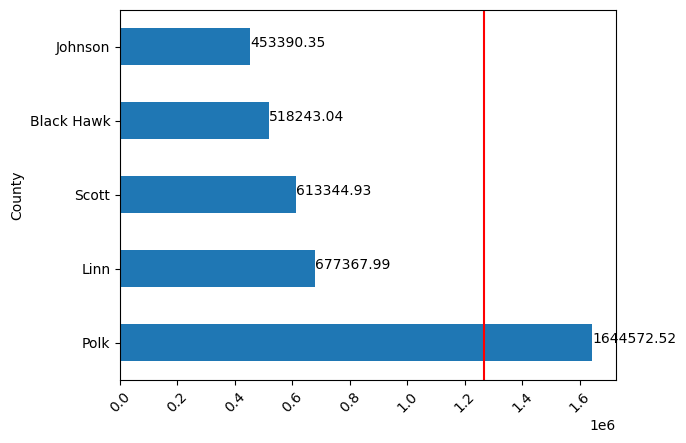

In [75]:
county_sales = location_sum('LiquorSales.csv', 'County', 'Sale (Dollars)')
print(county_sales)
county_sales.nlargest(5).plot(kind='barh');
for index, value in enumerate(county_sales.nlargest(5)): 
    plt.text(value, index,str(value))
plt.axvline(county_mean, color='red');
plt.xticks(rotation=45);

/tmp/ipykernel_400/3048273666.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


City
IRETON              131.62
WELLSBURG           134.98
Garnavillo          154.98
CLARKSVILLE         155.82
GOLDFIELD           174.66
                   ...    
IOWA CITY        311628.38
WATERLOO         339092.76
DAVENPORT        433119.96
CEDAR RAPIDS     520319.92
DES MOINES      1048027.83
Name: Sale (Dollars), Length: 329, dtype: float64


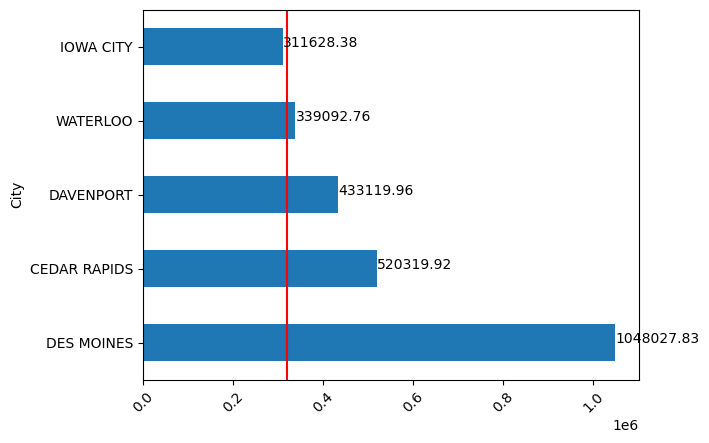

In [76]:
city_sales = location_sum('LiquorSales.csv', 'City', 'Sale (Dollars)')
print(city_sales)
city_sales.nlargest(5).plot(kind='barh');
for index, value in enumerate(city_sales.nlargest(5)): 
    plt.text(value, index,str(value))
plt.axvline(city_mean, color='red');
plt.xticks(rotation=45);